<a href="https://colab.research.google.com/github/SaiVenkat01/Projects/blob/main/RainfallPredictionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Dataset

In [2]:
dataset = pd.read_csv('weatherAUS.csv')

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
dataset.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,64679.000000,64848.000000,63842.000000,28173.000000,21365.000000,59235.000000,63929.000000,63311.000000,64016.000000,63559.000000,55209.000000,55261.000000,37937.000000,37159.000000,64352.000000,63837.000000
mean,11.397842,22.321623,2.508418,5.310659,7.435301,39.810197,13.397941,18.245629,71.488237,53.019273,1018.261465,1015.823251,4.606664,4.671143,16.024733,20.879047
std,6.387053,6.887341,8.712657,4.313724,3.813798,14.230242,9.236760,9.379320,17.715577,20.697049,7.015152,6.901594,2.922153,2.715958,6.114159,6.707737
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.800000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.600000,1011.200000,1.000000,2.000000,11.800000,16.500000
50%,11.700000,22.000000,0.000000,4.400000,8.400000,37.000000,13.000000,17.000000,72.000000,53.000000,1018.300000,1015.900000,5.000000,5.000000,16.400000,20.600000
75%,16.500000,26.700000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,85.000000,67.000000,1023.000000,1020.500000,7.000000,7.000000,20.600000,25.000000
max,30.500000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


In [5]:
#count all the null values in the data
dataset.isna().sum()

Date                 0
Location             0
MinTemp            619
MaxTemp            450
Rainfall          1456
Evaporation      37125
Sunshine         43933
WindGustDir       6071
WindGustSpeed     6063
WindDir9am        6674
WindDir3pm        2763
WindSpeed9am      1369
WindSpeed3pm      1987
Humidity9am       1282
Humidity3pm       1739
Pressure9am      10089
Pressure3pm      10037
Cloud9am         27361
Cloud3pm         28139
Temp9am            946
Temp3pm           1461
RainToday         1457
RainTomorrow      1456
dtype: int64

In [6]:
#it is clear that evaporation and sunshine have more missing values so better remove them 

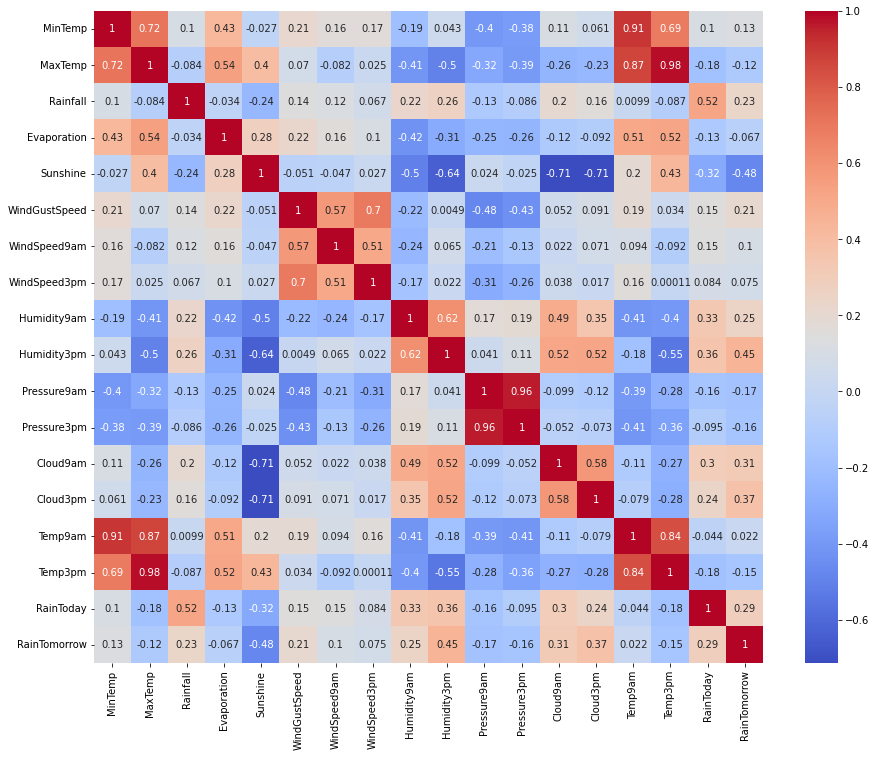

In [7]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(dataset.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

## **cleaning and preprocessing**

## Feature Selection

**bold text**

In [8]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [9]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['MelbourneAirport' 9.2 26.0 ... 15.7 24.8 0.0]
 ['MelbourneAirport' 15.3 25.8 ... 18.3 25.0 0.0]
 ['MelbourneAirport' 14.5 20.9 ... nan nan nan]]


In [10]:
print(Y)

[ 0.  0.  0. ...  0.  1. nan]


In [11]:
Y = Y.reshape(-1,1)


#Dealing with invalid Data

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [13]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 0.0]
 ['Albury' 7.4 25.1 ... 17.2 24.3 0.0]
 ['Albury' 12.9 25.7 ... 21.0 23.2 0.0]
 ...
 ['MelbourneAirport' 9.2 26.0 ... 15.7 24.8 0.0]
 ['MelbourneAirport' 15.3 25.8 ... 18.3 25.0 0.0]
 ['MelbourneAirport' 14.5 20.9 ... 19.0 18.4 0.0]]


In [14]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


#Encoding Dataset

In [15]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [16]:
print(X)

[[0 13.4 22.9 ... 16.9 21.8 0]
 [0 7.4 25.1 ... 17.2 24.3 0]
 [0 12.9 25.7 ... 21.0 23.2 0]
 ...
 [7 9.2 26.0 ... 15.7 24.8 0]
 [7 15.3 25.8 ... 18.3 25.0 0]
 [7 14.5 20.9 ... 19.0 18.4 0]]


In [17]:
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [18]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


#Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
print(X)

[[-1.65152411  0.30550383  0.08656555 ...  0.13686754  0.1469993
  -0.52941253]
 [-1.65152411 -0.63496515  0.40697559 ...  0.18620912  0.52337228
  -0.52941253]
 [-1.65152411  0.22713142  0.49436014 ...  0.81120259  0.35776817
  -0.52941253]
 ...
 [-0.55921302 -0.35282446  0.53805242 ... -0.06049882  0.59864688
  -0.52941253]
 [-0.55921302  0.60331901  0.50892424 ...  0.36712829  0.62875672
  -0.52941253]
 [-0.55921302  0.47792315 -0.2047163  ...  0.48225866 -0.36486795
  -0.52941253]]


In [21]:
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

## MODELLING

#Splitting Dataset into Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=None)

In [23]:
print(X_train)

[[-1.49547966  0.16443348  0.59630879 ...  0.59738904  0.44809769
  -0.52941253]
 [-1.18339078 -0.27445204  0.14482192 ... -0.06049882  0.26743866
  -0.52941253]
 [-1.49547966 -0.90143136 -0.02994719 ... -0.20852359 -0.00354989
  -0.52941253]
 ...
 [-1.02734634 -1.66948104 -1.35527962 ... -1.93547922 -1.37354754
  -0.52941253]
 [ 0.06496475  0.55629556 -0.83097228 ...  0.00528996 -0.66596633
   1.88888615]
 [ 0.22100919  1.3556942   0.42153968 ...  1.10725213  0.43304277
   1.88888615]]


In [24]:
print(Y_train)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]


In [25]:
Y_test.shape


(13060, 1)

## MODELS

#Training Model

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100,random_state=0)
classifier_rf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [27]:
classifier_rf.score(X_train,Y_train)

0.9998085684750565

In [28]:
y_pred_rf = le6.inverse_transform(np.array(classifier_rf.predict(X_test),dtype=int))
Y_test_rf = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(y_pred_rf)

[0. 0. 0. ... 0. 0. 0.]


In [30]:
print(Y_test_rf)

[0. 0. 1. ... 0. 0. 0.]


In [31]:
y_pred_rf = y_pred_rf.reshape(-1,1)
Y_test_rf = Y_test_rf.reshape(-1,1)

In [32]:
df = np.concatenate((Y_test_rf,y_pred_rf),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [33]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    0.0                0.0
2                    1.0                0.0
3                    0.0                0.0
4                    0.0                0.0
...                  ...                ...
13055                0.0                0.0
13056                0.0                0.0
13057                0.0                0.0
13058                0.0                0.0
13059                0.0                0.0

[13060 rows x 2 columns]


Calculating Accuracy of random forest

In [34]:
from sklearn.metrics import accuracy_score
acc_rfs=accuracy_score(Y_test_rf,y_pred_rf)
acc_rfs

0.8460949464012251

In [35]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm=confusion_matrix(Y_test_rf,y_pred_rf)
print(cm)


[[9716  424]
 [1586 1334]]


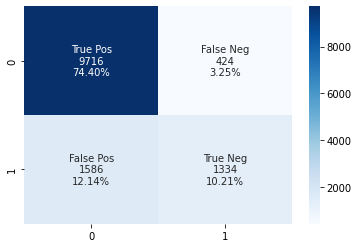

In [36]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues');

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_rf,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     10140
         1.0       0.76      0.46      0.57      2920

    accuracy                           0.85     13060
   macro avg       0.81      0.71      0.74     13060
weighted avg       0.84      0.85      0.83     13060



# **Logisitic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression  
classifier_lr = LogisticRegression(random_state=0)  
classifier_lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [39]:
classifier_lr.score(X_train,Y_train)

0.83481373712623

In [40]:
y_pred_lr = le6.inverse_transform(np.array(classifier_lr.predict(X_test),dtype=int))
Y_test_lr = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print(y_pred_lr)

[0. 0. 0. ... 0. 0. 0.]


In [42]:
print(Y_test_lr)

[0. 0. 1. ... 0. 0. 0.]


In [43]:
y_pred_lr = y_pred_lr.reshape(-1,1)
Y_test_lr = Y_test_lr.reshape(-1,1)

In [44]:
df = np.concatenate((Y_test_lr,y_pred_lr),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [45]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    0.0                0.0
2                    1.0                0.0
3                    0.0                0.0
4                    0.0                0.0
...                  ...                ...
13055                0.0                0.0
13056                0.0                0.0
13057                0.0                0.0
13058                0.0                0.0
13059                0.0                0.0

[13060 rows x 2 columns]


In [46]:
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(Y_test_lr,y_pred_lr)
acc_lr

0.8300153139356815

In [47]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lr=confusion_matrix(Y_test_lr,y_pred_lr)
print(cm_lr)


[[9615  525]
 [1695 1225]]


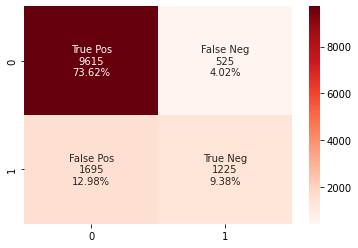

In [48]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lr.flatten()/np.sum(cm_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Reds');

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     10140
         1.0       0.70      0.42      0.52      2920

    accuracy                           0.83     13060
   macro avg       0.78      0.68      0.71     13060
weighted avg       0.82      0.83      0.81     13060



# **DecisionTree Classifier**

In [50]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier_dt.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
classifier_dt.score(X_train,Y_train)

0.9998468547800452

In [52]:
y_pred_dt = le6.inverse_transform(np.array(classifier_dt.predict(X_test),dtype=int))
Y_test_dt = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
print(y_pred_dt)

[0. 0. 0. ... 0. 0. 0.]


In [54]:
print(Y_test_dt)

[0. 0. 1. ... 0. 0. 0.]


In [55]:
y_pred_dt = y_pred_dt.reshape(-1,1)
Y_test_dt = Y_test_dt.reshape(-1,1)

In [56]:
df = np.concatenate((Y_test_dt,y_pred_dt),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [57]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    0.0                0.0
2                    1.0                0.0
3                    0.0                0.0
4                    0.0                1.0
...                  ...                ...
13055                0.0                0.0
13056                0.0                0.0
13057                0.0                0.0
13058                0.0                0.0
13059                0.0                0.0

[13060 rows x 2 columns]


In [58]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(Y_test_dt,y_pred_dt)
acc_dt

0.7757274119448698

In [59]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_dt=confusion_matrix(Y_test_dt,y_pred_dt)
print(cm_dt)

[[8696 1444]
 [1485 1435]]


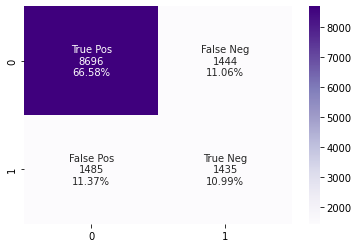

In [60]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_dt.flatten()/np.sum(cm_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt, annot=labels, fmt="", cmap='Purples');

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_dt,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     10140
         1.0       0.50      0.49      0.49      2920

    accuracy                           0.78     13060
   macro avg       0.68      0.67      0.68     13060
weighted avg       0.77      0.78      0.78     13060



# **Light Gbm**

In [62]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(random_state =0)
classifier_lgbm.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=0)

In [64]:
classifier_lgbm.score(X_train,Y_train)

0.8673953826716183

In [65]:
y_pred_lgbm = le6.inverse_transform(np.array(classifier_lgbm.predict(X_test),dtype=int))
Y_test_lgbm = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print(y_pred_lgbm)

[0. 0. 0. ... 0. 0. 0.]


In [67]:
print(Y_test_lgbm)

[0. 0. 1. ... 0. 0. 0.]


In [68]:
y_pred_lgbm = y_pred_lgbm.reshape(-1,1)
Y_test_lgbm = Y_test_lgbm.reshape(-1,1)

In [69]:
df = np.concatenate((Y_test_lgbm,y_pred_lgbm),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [70]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    0.0                0.0
2                    1.0                0.0
3                    0.0                0.0
4                    0.0                0.0
...                  ...                ...
13055                0.0                0.0
13056                0.0                0.0
13057                0.0                0.0
13058                0.0                0.0
13059                0.0                0.0

[13060 rows x 2 columns]


In [71]:
from sklearn.metrics import accuracy_score
acc_lg=accuracy_score(Y_test_lgbm,y_pred_lgbm)
acc_lg

0.8486983154670751

In [72]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_lg=confusion_matrix(Y_test_lgbm,y_pred_lgbm)
print(cm_lg)

[[9671  469]
 [1507 1413]]


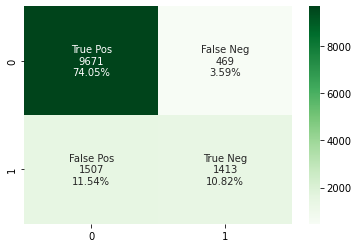

In [73]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_lg.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lg, annot=labels, fmt="", cmap='Greens');

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_lgbm,y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     10140
         1.0       0.75      0.48      0.59      2920

    accuracy                           0.85     13060
   macro avg       0.81      0.72      0.75     13060
weighted avg       0.84      0.85      0.84     13060



# **Naive Bayes**

In [75]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [76]:
classifier_nb.score(X_train,Y_train)

0.8051609939124775

In [77]:
y_pred_nb = le6.inverse_transform(np.array(classifier_nb.predict(X_test),dtype=int))
Y_test_nb = le6.inverse_transform(np.array(Y_test,dtype=int))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
print(y_pred_nb)

[0. 0. 1. ... 0. 0. 0.]


In [79]:
print(Y_test_nb)

[0. 0. 1. ... 0. 0. 0.]


In [80]:
y_pred_nb = y_pred_nb.reshape(-1,1)
Y_test_nb = Y_test_nb.reshape(-1,1)

In [81]:
df = np.concatenate((Y_test_nb,y_pred_nb),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

In [82]:
print(dataframe)

       Rain on Tommorrow  Predition of Rain
0                    0.0                0.0
1                    0.0                0.0
2                    1.0                1.0
3                    0.0                0.0
4                    0.0                0.0
...                  ...                ...
13055                0.0                0.0
13056                0.0                0.0
13057                0.0                0.0
13058                0.0                0.0
13059                0.0                0.0

[13060 rows x 2 columns]


In [83]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(Y_test_nb,y_pred_nb)
acc_nb

0.7980091883614089

In [84]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm_nb=confusion_matrix(Y_test_nb,y_pred_nb)
print(cm_nb)

[[9018 1122]
 [1516 1404]]


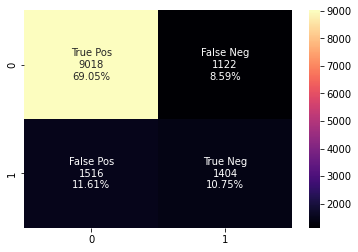

In [85]:
group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_nb.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_nb, annot=labels, fmt="", cmap='magma');

In [86]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_nb,y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     10140
         1.0       0.56      0.48      0.52      2920

    accuracy                           0.80     13060
   macro avg       0.71      0.69      0.69     13060
weighted avg       0.79      0.80      0.79     13060



## Accuracy Comparison

In [87]:
accuracy_dict = {"Logistic Regression": acc_lr,
                 "Random Forest": acc_rfs,
                 "Decision Trees": acc_dt,
                 "LightGBM": acc_lg,
                 "Naive Bayes": acc_nb}

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.830015
Random Forest,0.846095
Decision Trees,0.775727
LightGBM,0.848698
Naive Bayes,0.798009


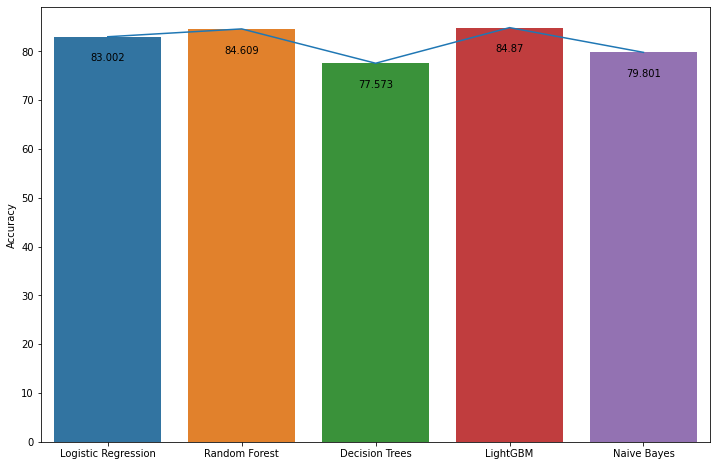

In [88]:
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.text(i, y-5, str(y), ha = "center")

In [89]:
import numpy as np
from sklearn.preprocessing import StandardScaler
test=np.array([[15,15,15,15,15,15,15,15,15,14,13,1121,11,10,15,15,15],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5]
               ,[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],
               [5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],[5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5],
               [5,5,5,5,5,5,5,5,5,4,3,2,1,0,5,5,5]])
sc1 = StandardScaler()
test = sc1.fit_transform(test)

y_ans=np.array([[1,1,0,0,0,0,0,0,0,0]]) #what is the actual
user_input = le6.inverse_transform(np.array(classifier_lgbm.predict(test),dtype=int)) #what we predicted
user_input=user_input.reshape(-1,1)
y_ans=y_ans.reshape(-1,1)


In [90]:
from sklearn.metrics import accuracy_score
acc_ans=accuracy_score(y_ans,user_input)
print(acc_ans)

0.9
